In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler

In [3]:
df_train = pd.read_csv(r"C:\Users\fkost\OneDrive\Escritorio\Educación\Hackaton\Hackathon-main\Housing Dreams\house_train_raw.csv")

c:\Users\fkost\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

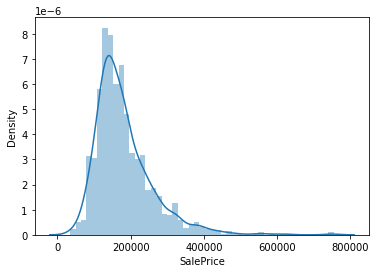

In [4]:
sns.distplot(df_train['SalePrice'])

In [5]:
#Estudio de la variable SalePrice
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


In [6]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


In [7]:
# Eliminamos variables con mas de un valor nulo, y el valor faltante de "Electrical"
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)


C:\Users\fkost\AppData\Local\Temp\ipykernel_8928\3479833702.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)


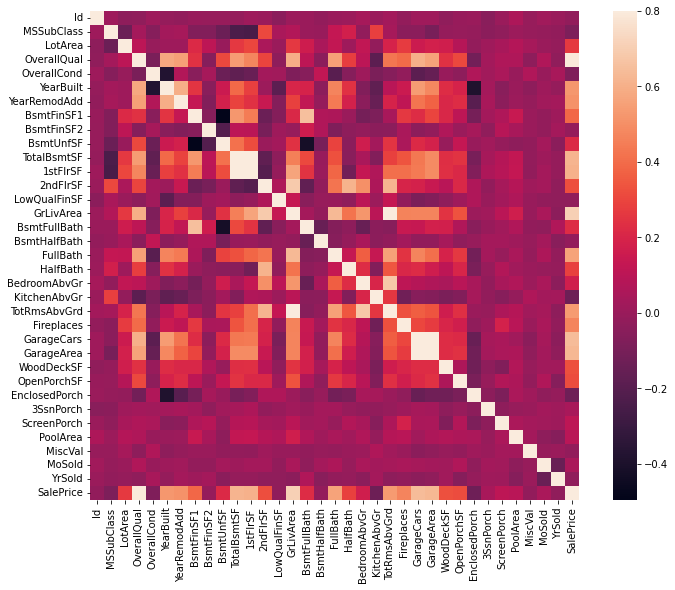

In [8]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

Pruebo como se comportan las distintas variables en el mapa de puntos

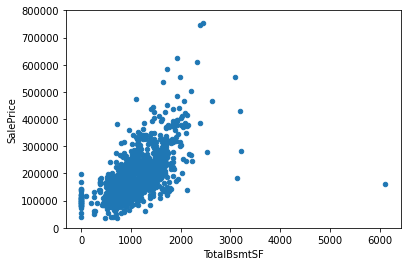

In [9]:
#scatter plot variable/saleprice
var = 'TotalBsmtSF' # variable
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

Pruebo variables categóricas

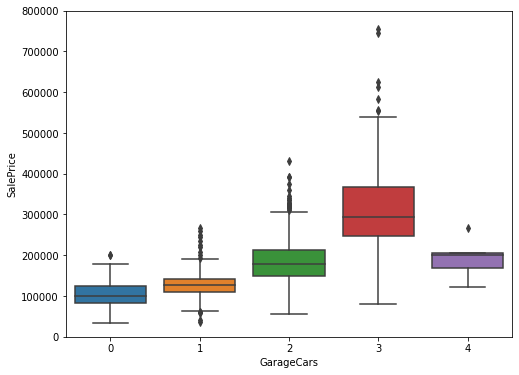

In [10]:
#box plot variable/saleprice
var = 'GarageCars'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

c:\Users\fkost\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


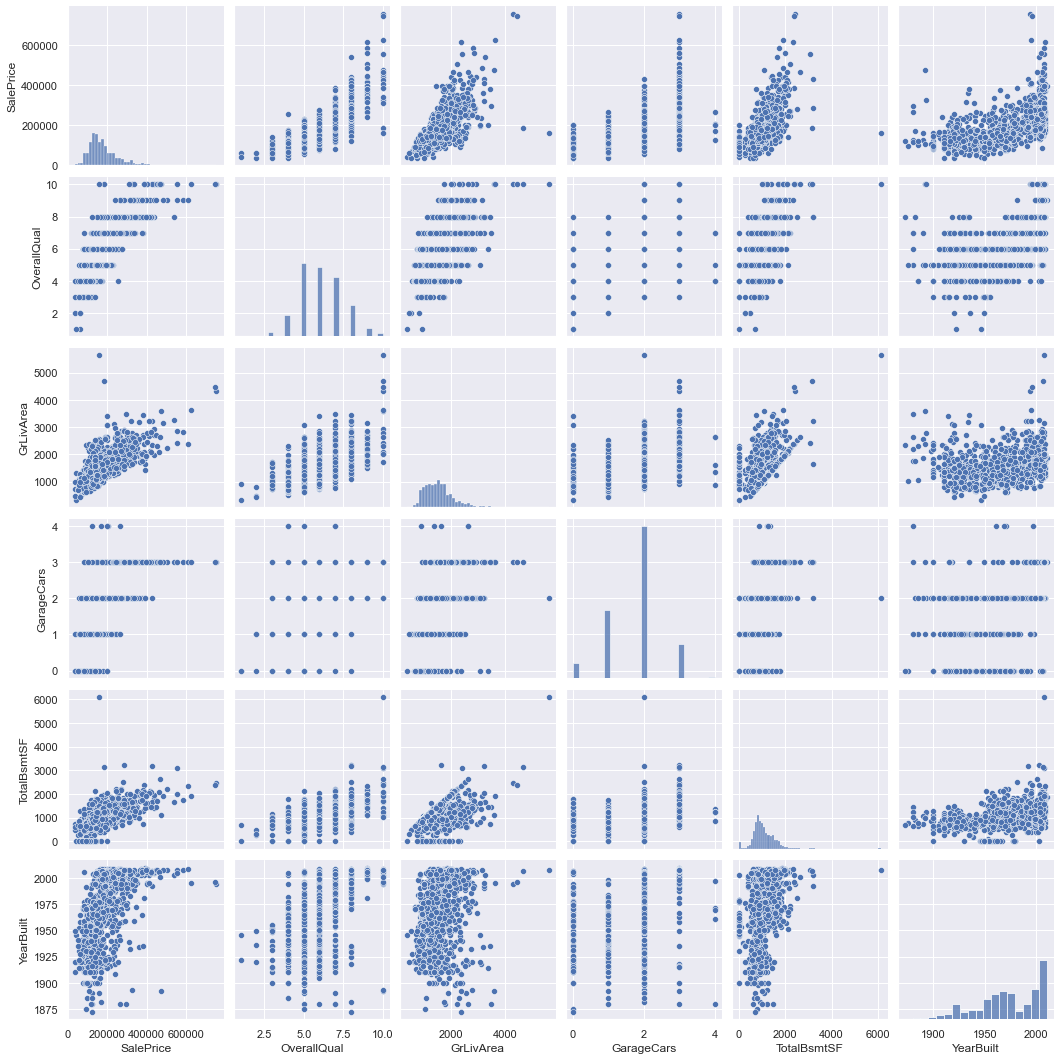

In [11]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

In [12]:
# Estandarización de datos
# StandardScaler es que transformará sus datos de manera que su distribución tenga un valor medio 0 y una desviación estándar de 1
# El método numpy.newaxis es un alias de None, que se utiliza para indexar matrices en Python
# argsort Devuelve los índices que ordenarían una matriz
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)


outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


C:\Users\fkost\AppData\Local\Temp\ipykernel_8928\2169346541.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis]);


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


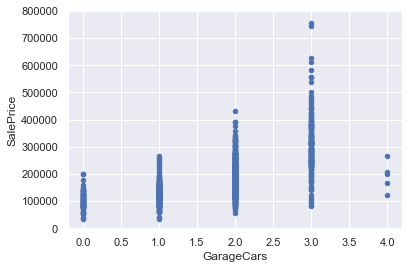

In [13]:
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [15]:
df_train = df_train.drop(df_train[df_train['Id'] == 524].index)

In [16]:
df_train2 = df_train.copy()

475000	1892

In [17]:
var1 = df_train2[df_train2['TotalBsmtSF'] == 6110].index

In [18]:
var2 = df_train2.drop(var1)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


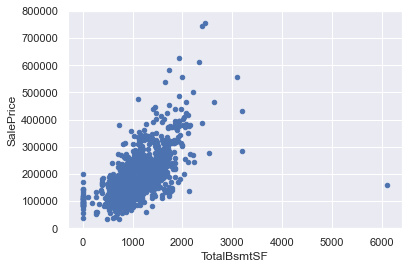

In [20]:
# Elimino Outliers de la variable "TotalBsmtSF"
var = 'TotalBsmtSF'
data = pd.concat([df_train2['SalePrice'], df_train2[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


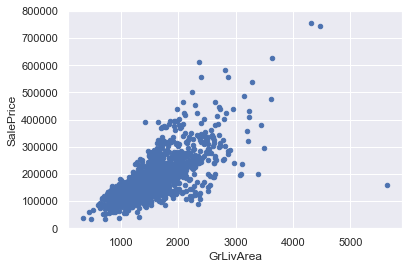

In [21]:
# Elimino outliers de la variabable GrLivArea
var02 = 'GrLivArea'
data02 = pd.concat([df_train2['SalePrice'], df_train2[var02]], axis=1)
data02.plot.scatter(x=var02, y='SalePrice', ylim=(0,800000));

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


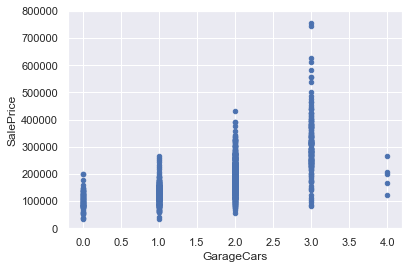

In [22]:
# Elimino outliers de la variabable GarageCars
var03 = 'GarageCars'
data03 = pd.concat([df_train2['SalePrice'], df_train2[var03]], axis=1)
data03.plot.scatter(x=var03, y='SalePrice', ylim=(0,800000));

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


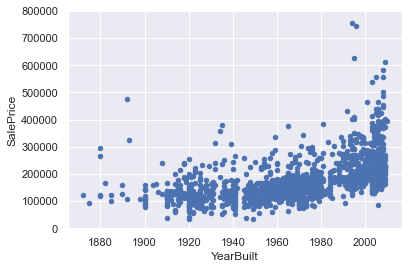

In [23]:
#Elimino outliers de la variabable YearBuilt
var04 = 'YearBuilt'
data04 = pd.concat([df_train2['SalePrice'], df_train2[var04]], axis=1)
data04.plot.scatter(x=var04, y='SalePrice', ylim=(0,800000));

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


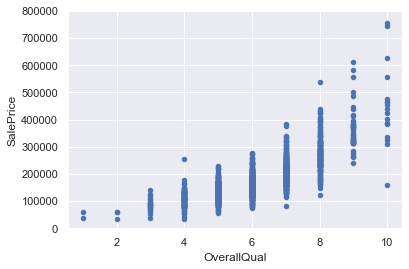

In [24]:
#Elimino outliers de la variabable YearBuilt
var05 = 'OverallQual'
data05 = pd.concat([df_train2['SalePrice'], df_train2[var05]], axis=1)
data05.plot.scatter(x=var05, y='SalePrice', ylim=(0,800000));

In [25]:
# Localizo el ID del outlier 

df_train2[df_train2['YearBuilt'] == 1892]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
185,186,75,RM,22950,Pave,IR2,Lvl,AllPub,Inside,Gtl,...,0,0,410,0,0,6,2006,WD,Normal,475000
1292,1293,70,RM,6600,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,12,2009,WD,Normal,107500


In [26]:
# Elimino efectivamente al Outlier
df_train2 = df_train2.drop(df_train2[df_train2['Id'] == 186].index)

In [27]:
df_train2

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [28]:
data04[data04["SalePrice"] > 450000]

,SalePrice,YearBuilt
178,501837,2008
185,475000,1892
440,555000,2008
591,451950,2008
691,755000,1994
769,538000,2003
798,485000,2008
803,582933,2008
898,611657,2009
1046,556581,2005


Los outliers de precio serán conservaods ya que parecen respetar en algún punto la tendencia
Por otro lado, los outliers en el área no parecen tener relación con el comportamiento habitual del fenómeno a estudiar así que serán eliminados

In [29]:
# elimino outliers
df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]
df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
df_train = df_train.drop(df_train[df_train['Id'] == 524].index)

In [30]:
df_train.sort_values(by = 'GrLivArea', ascending = False)[:5]


,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1182,1183,60,RL,15623,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,555,0,7,2007,WD,Abnorml,745000
691,692,60,RL,21535,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,1,2007,WD,Normal,755000
1169,1170,60,RL,35760,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,0,0,7,2006,WD,Normal,625000
185,186,75,RM,22950,Pave,IR2,Lvl,AllPub,Inside,Gtl,...,0,0,410,0,0,6,2006,WD,Normal,475000
304,305,75,RM,18386,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,5,2008,WD,Normal,295000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


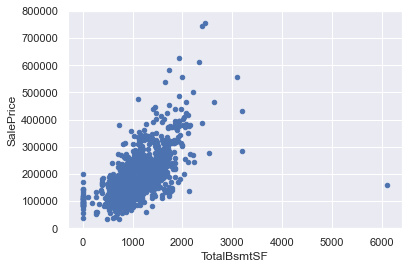

In [31]:
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

Arranco el machine learning

In [32]:
df_train3 = df_train2.copy()

In [33]:
#Transformo en dummy la variable OverallQual
df_train3= pd.concat([df_train3, pd.get_dummies(df_train3["OverallQual"])], axis=1)

In [34]:
df_train4 = df_train3[['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'YearBuilt']]

In [40]:
ML = df_train4.copy()

In [42]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
from sklearn.model_selection import train_test_split

In [43]:
X = ML.drop(['SalePrice'], axis=1).values
Y = ML['SalePrice'].values

In [44]:
x_train, x_test, y_train_, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [45]:
linear_regression.fit(x_train, y_train_)

LinearRegression()

In [46]:
y_pred = linear_regression.predict(x_test)
print(y_pred)

[222714.2360549  227696.55594865 277572.06725565 306330.95570693
 273818.02567663 143429.93850004 132990.70608933 210871.48175543
 250838.40208955 211480.47596491   2456.36525481 150709.67647784
 131804.08103533 135078.18520759  70646.69903201 130265.15687222
 225778.48653464  92693.41767607 127315.9429146  120239.47780894
 267349.91562484 305890.63105679 122372.45882671 114010.82606161
 369326.24475094 269262.85090705 128099.335215   113613.57926436
 184171.24642953 249423.63665574 135064.22356799 134279.34340327
 171718.35084768 214261.12184713  70253.94762916 138633.96786906
 128361.38428855 153573.16130117 256975.53900077 171088.43266523
 129613.99823335 193997.17899516 225436.28592823 145644.34788342
 141271.95944972 174203.13308303 129810.58580653 170020.28880236
 191341.78473711 255267.00524458 185690.84680906 311353.28285309
 138283.85854565 200168.29479885 275436.1334233  119274.87886871
 284278.81711961 104387.48685187 211300.81216476 144559.82550744
  98815.94290389 111534.4

In [49]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.ensemble import RandomForestRegressor


In [50]:
modeloRF = RandomForestRegressor(n_estimators=100, random_state=0)

In [51]:
# Entreno el modelo
modeloRF.fit(x_train, y_train_)

RandomForestRegressor(random_state=0)

In [52]:
modeloRF.predict(x_test)

array([221104.96      , 224130.3       , 307214.84      , 295967.38      ,
       298493.99      , 149924.47666667, 136193.75      , 207202.5       ,
       239878.36      , 205466.0425    ,  60506.32      , 149468.64      ,
       135793.41666667, 139309.        ,  95362.61      , 127358.        ,
       201749.8       , 117177.44      , 127056.75      , 133839.5       ,
       287175.9       , 318220.7       , 126985.        , 119924.79      ,
       501920.65      , 268013.51      , 138667.5       , 116466.5       ,
       166150.        , 227551.98      , 137882.75      , 140241.        ,
       164559.        , 217251.96      ,  91540.        , 145023.        ,
       110502.5       , 147275.5       , 254902.3       , 157299.5       ,
       115634.86      , 179082.        , 204978.6       , 155108.        ,
       134013.25      , 160915.4       , 138757.        , 170043.        ,
       158450.        , 223825.44      , 173573.33333333, 341462.77      ,
       133070.25      , 1

In [54]:
modeloRF.score(x_test, y_test)

0.8523593005300912

In [55]:
 # rmse logaritmico del random forest 
mean_squared_log_error(y_test, modeloRF.predict(x_test), squared=False)

0.1654803807579269

In [56]:
linear_regression.score(x_train, y_train_)

0.7699792152932194

In [58]:
# rmse logaritmico de la regresion 
mean_squared_log_error(y_test, y_pred, squared=False)

0.26812124521728914